# Seoul Air Quality Level Prediction

## 1. Seoul Air Quality Dataset

This dataset is collected from @seoul_air, including Seoul air quality data from 2008 to 2018. Air quality is impacted by many factors such as traffic volume, neighboring area AQ situations, weather, seasonal information, and other economic activities. Many works have addressed the relationship between AQ level and other factors via numerous modeling approaches. For instance, during the Chuseok holidays, the AQI tends to get better, while it is serious during weekdays, especially with foggy weather conditions or in the yellow dust season. You can refer to [3-5] for more information on how researchers used this dataset in their works. 

| Column | Description |
|---------|---------|
| Datetime | Timestamp |
| District | District code 0-25 (Code 0 represents the average value of all 25 districts in Seoul). Other districts are identified from 1 to 25.  The order of district codes is 0 - 평균, 1 - 종로구, 2 - 중구, 3 - 용산구, 4 - 성동구, 5 - 광진구, 6 - 동대문구, 7 - 중랑구, 8 - 성북구, 9 - 강북구, 10 - 도봉구, 11 - 노원구, 12 - 은평구, 13 - 서대문구, 14 - 마포구, 15 - 양천구, 16 - 강서구, 17 - 구로구, 18 - 금천구, 19 - 영등포구, 20 - 동작구, 21 - 관악구, 22 - 서초구, 23 - 강남구, 24 - 송파구, 25 - 강동구 |
| PM10_CONC | PM10 concentration (µg/m3) |
| PM2_5_CONC | PM2.5 concentration (µg/m3) |
|O3         | Ozone concentration (µg/m3) |
| NO2 | NO2 concentration (µg/m3) |
| CO | CO concentration (µg/m3) |
| SO2 | SO2 concentration (µg/m3) |
| PM10_AQI | PM10 AQI Index according to US Standard AQI Index |
| PM2_5_AQI | PM2.5 AQI Index according to US Standard AQI Index |

## 2. Additional Data Sources
<figure>
<img src="./_images/ml_system.png" alt="ml_system" width="80%" height="80%">
<figcaption>Image Source From https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf</figcaption>
</figure>

As the figure shows, we spend most of the time on data collection, cleansing, and pre-processing. Only a small amount of time is for machine learning model development. To increase the accuracy of models, we must try to find additional data to verify our hypotheses.

### 2.1 Weather Data

<figure>
<img width="500px" src="./_images/seoul_weather.png" alt="ml_system" width="80%" height="80%">
<figcaption>Seoul Weather from worldweatheronline.com</figcaption>
</figure>

Many researches have pointed out that air quality level relates to weather conditions. For instance, AQ levels get better after a heavy rain, or it usually gets worse during the winter season. For more information, please check out reference papers.

### 2.2 Holiday Information

<figure>
<img width="500px" src="./_images/holiday.png" alt="ml_system" width="80%" height="80%">
<figcaption>Seoul Holidays from timeanddata.com</figcaption>
</figure>

Similar to weather data, we can collect holiday information from websites like timeanddata.com. 

## 3. Data Pre-processing

In [33]:
import pandas as pd
import numpy as np

### 3.1 Data loading

As the original Seoul AQ dataset contains 25 information of 25 districts, it's too large for this example. Therefore, we only work with the overall AQ dataset only. In short, we extract city-level air quality data from the original dataset.

In [64]:
seoul_air = pd.read_csv('/home/alexbui/workspace/HandbookForDatascience/notebooks/data/seoul_air_avg.csv')

In [13]:
seoul_air

,Datetime,PM10_CONC,PM2_5_CONC,O3,NO2,CO,SO2,PM10_AQI,PM2_5_AQI
0,2008-01-01 01:00:00,59.0,14.0,0.017,0.017,0.4,0.007,53.0,55.0
1,2008-01-01 02:00:00,52.0,14.0,0.018,0.016,0.4,0.007,48.0,55.0
2,2008-01-01 03:00:00,49.0,14.0,0.019,0.015,0.4,0.007,45.0,55.0
3,2008-01-01 04:00:00,45.0,15.0,0.020,0.014,0.4,0.007,42.0,57.0
4,2008-01-01 05:00:00,41.0,15.0,0.020,0.013,0.4,0.007,38.0,57.0
...,...,...,...,...,...,...,...,...,...
91656,2018-06-18 07:00:00,46.0,33.0,0.010,0.033,0.5,0.003,43.0,95.0
91657,2018-06-18 08:00:00,49.0,33.0,0.013,0.037,0.6,0.003,45.0,95.0
91658,2018-06-18 09:00:00,54.0,37.0,0.022,0.038,0.6,0.004,50.0,105.0
91659,2018-06-18 10:00:00,62.0,42.0,0.036,0.038,0.6,0.004,54.0,117.0


### 3.2 Check missing values 

In [16]:
for c in seoul_air.columns:
    print(c, seoul_air[c].isnull().sum())

Datetime 0
PM10_CONC 0
PM2_5_CONC 0
O3 0
NO2 0
CO 0
SO2 0
PM10_AQI 0
PM2_5_AQI 0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

### 3.3 Check outlier values

In [58]:
def check_outliners(seoul_air, c):
    col = seoul_air.loc[:,c]
    abs_skew = col.skew()
    mean_v = col.mean()
    median_v = col.median()
    q3 = np.nanpercentile(col, 75)
    q1 = np.nanpercentile(col, 25)
    iqr = (q3 - q1) * 1.5
    ceiling = iqr + q3
    # floor = q1 - iqr 
    # col[(col > ceiling) | (col < floor)]
    print("num of outlier", c, col[col > ceiling].count())
    if abs_skew > 1:
        col[col > ceiling] = median_v
    else:
        col[col > ceiling] = mean_v    


In [61]:
for c in seoul_air.columns[1:7]:
    check_outliners(seoul_air, c)

num of outlier PM10_CONC 3857
num of outlier PM2_5_CONC 3611
num of outlier O3 2320
num of outlier NO2 766
num of outlier CO 9354
num of outlier SO2 3913


### 3.4 Plotting

***Plot correlation to first understand feature interactions***

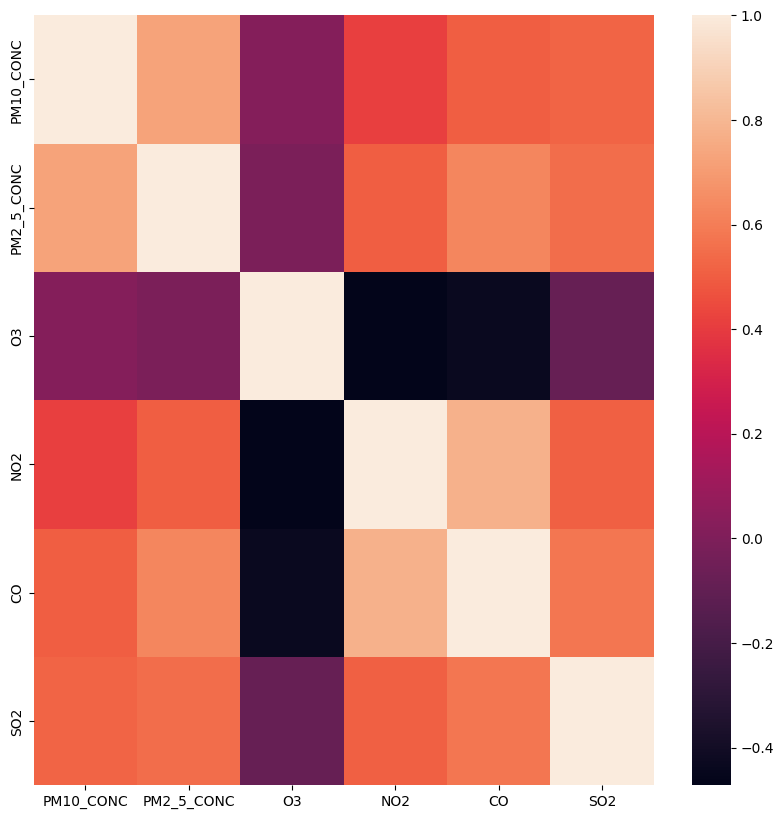

In [23]:
corr = seoul_air.iloc[:,1:7].corr()
fix, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr)
plt.show()

***Align 1h to check correlation with previous hour***

In [29]:
align0 = seoul_air.iloc[:-1,1:7]
align0.columns = [c + "_m1" for c in align0.columns]
align1 = seoul_air.iloc[1:,1:7]
align = pd.concat([align1, align0], axis=1)


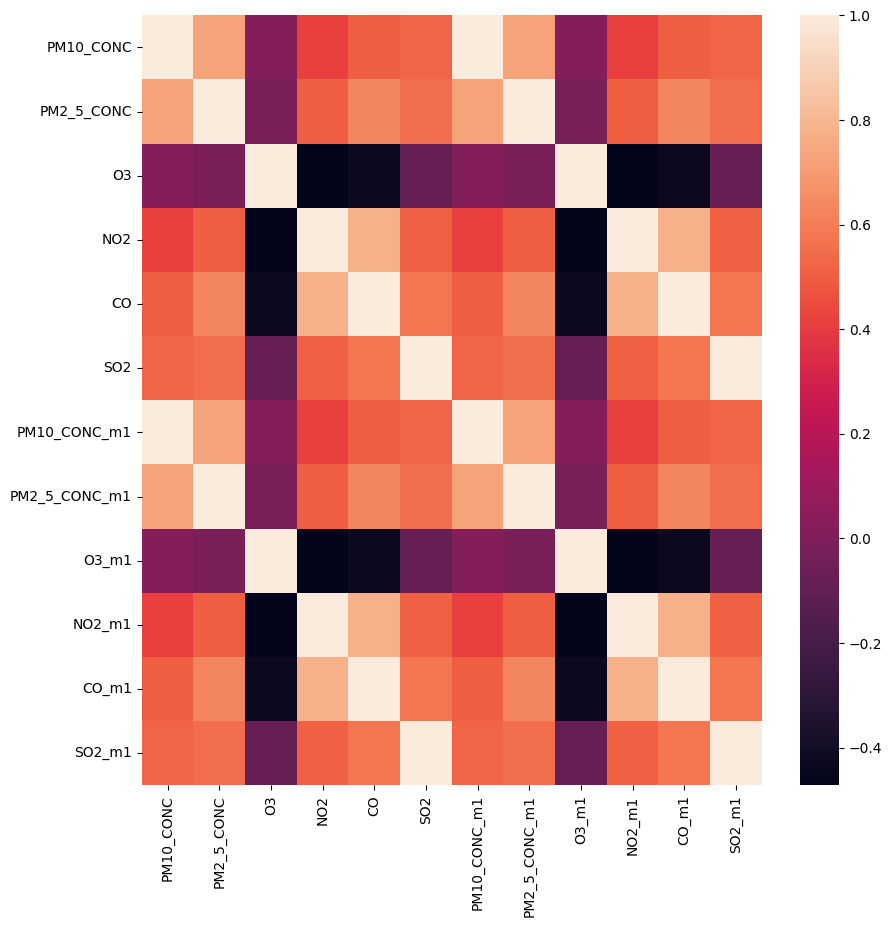

In [30]:
align_corr = align.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(align_corr)
plt.show()

***Align 4h to check correlation with 4 hours ago***

In [31]:
align04 = seoul_air.iloc[:-4,1:7]
align04.columns = [c + "_m4" for c in align04.columns]
align14 = seoul_air.iloc[4:,1:7]
align4 = pd.concat([align14, align04], axis=1)

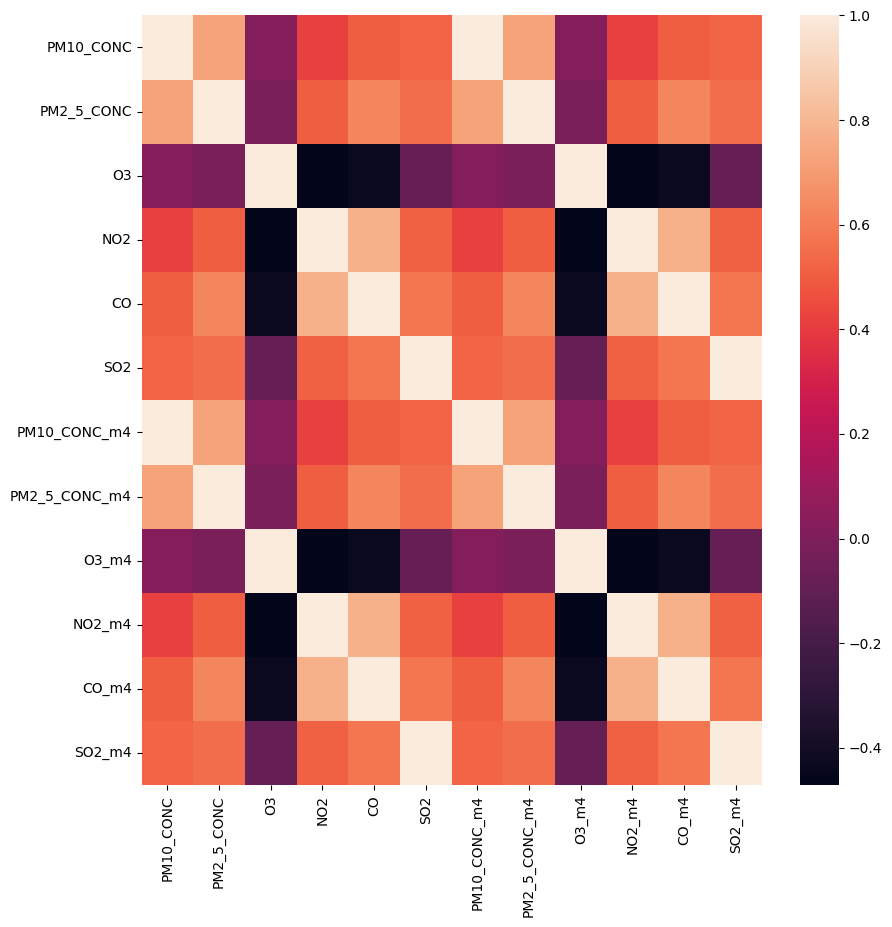

In [32]:
align_corr4 = align4.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(align_corr4)
plt.show()

## 4. Model Construction

## 5. Explain the Results